# EE Calculation from Scratch

Here's another (correct) way to calculate the EE,

First we will make a system where we describe the random variable states from a value of $[0, 1]$

$$
\ket{\psi} = \begin{pmatrix} 0.38 \\ 0.45 \\ 0.56 \\ \vdots \end{pmatrix}
$$

where the length of the column matrix is $N = 2^{n}$, with $n$ as the number of qubits we want to study and calculate the entanglement entropy.
Now that we have a random statevector, we would like to re-write it as a combination of its basis, 

$$
\ket{\psi} = \begin{pmatrix} 0.38 \\ 0.45 \\ 0.56 \\ \vdots \end{pmatrix} = 0.38 \begin{pmatrix} 1 \\ 0 \\ 0 \\ \vdots \end{pmatrix} + 0.45 \begin{pmatrix} 0 \\ 1 \\ 0 \\ \vdots \end{pmatrix} + 0.56 \begin{pmatrix} 0 \\ 0 \\ 1 \\ \vdots \end{pmatrix} + \cdots.
$$

We would need to normalize the statevector by taking $\rho = \sum_i a_i a^*_i\ket{i}\bra{i} = 1$.
Lets realize this into python,

In [1]:
import numpy as np

In [2]:
def psi_initial_random_state(nQubits = 8, min_val = 0, max_val = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    gaussian_ensemble = np.random.uniform(min_val, max_val, size = (nQubits, 1))
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    return gaussian_ensemble 

In [3]:
test_psi_initial_random_state = psi_initial_random_state(4)
test_psi_initial_random_state

array([[0.05909613],
       [0.51441531],
       [0.47544773],
       [0.15909784]])

now that we have a random state $\ket{\psi}$, we want to normalize the state so that $\rho = \sum_{ij} a_i a^*_j \ket{i}\bra{j} =1 $.

In [4]:
def normalize(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix
    return norm_arr

In [5]:
normalized_test_psi_initial_random_state = normalize(test_psi_initial_random_state)
print(f"Here's the normalized random state :\n",normalized_test_psi_initial_random_state)
Y = normalized_test_psi_initial_random_state*normalized_test_psi_initial_random_state
print(f"and here's the sum of the normalized density matrix :\n",sum(Y))

Here's the normalized random state :
 [[0.08199274]
 [0.71372392]
 [0.65965847]
 [0.2207398 ]]
and here's the sum of the normalized density matrix :
 [1.]


Okay, now that we have a normalized statevector, we can start to translate each of the components of the matrix into a binary number which corresponds to the state of the system.

For example, for an nQubit column vector, we have the first component symbolized as `psi[0]` with a certain normalized constant of $a_{[0]}$, as in python, the first component have the index of 0. This would represent the following state,
$$
\psi[0] \rightarrow a_{[0]}\ket{00000\cdots 00},
$$
where the length of the ket is nQubits.

and for $\psi_{[1]}$, it would correspond a state of,
$$
\psi[1] \rightarrow a_{[1]}\ket{00000\cdots 01},
$$
and so on. Here it is clear that our system just use the index of the array and translate it into binary that will correspond into the actual quantum state.
Before thinking about how to separate the system into 2 sub-system, lets translate it first.

From Vinay's explanation, the first step I want to do is to determine the size of subsystem A and B as $n_A$ and $n_B$ respectively.

So for a system with a total of 4 qubits, I want to start from $n_A = 1$ and $n_B = 3$, where I would need to create a basis with the size of $2^{n_A}$ and $2^{n_B}$.


In [6]:
n_A = 2
n_B = 3

Creating the basis

In [7]:
basis_A = np.random.uniform(0, 1, (2**n_A, 1))
print(f"Basis for subsystem A :\n",basis_A)
basis_B = np.random.uniform(0, 1, (2**n_B, 1))
print(f"Basis for subsystem B :\n",basis_B)

Basis for subsystem A :
 [[0.29650532]
 [0.108582  ]
 [0.87204695]
 [0.23457501]]
Basis for subsystem B :
 [[0.15024211]
 [0.99051392]
 [0.21651915]
 [0.16005066]
 [0.26254737]
 [0.84750628]
 [0.59807119]
 [0.31576786]]


In [8]:
Psi_AB = np.kron(basis_A, basis_B)
print(f"State of 'Psi' as kronecker product of basis A and B :\n",
      Psi_AB)

State of 'Psi' as kronecker product of basis A and B :
 [[0.04454759]
 [0.29369265]
 [0.06419908]
 [0.04745587]
 [0.07784669]
 [0.25129012]
 [0.17733129]
 [0.09362685]
 [0.01631359]
 [0.10755198]
 [0.02351008]
 [0.01737862]
 [0.02850792]
 [0.09202392]
 [0.06493976]
 [0.0342867 ]
 [0.13101818]
 [0.86377464]
 [0.18881486]
 [0.13957169]
 [0.22895364]
 [0.73906527]
 [0.52154616]
 [0.2753644 ]
 [0.03524305]
 [0.23234981]
 [0.05078998]
 [0.03754388]
 [0.06158705]
 [0.19880379]
 [0.14029255]
 [0.07407125]]


In [9]:
len(Psi_AB)

32

Normalizing the column vector (State of $\Psi$)

In [10]:
norm = np.linalg.norm(Psi_AB)

# Normalize the vector
normalized_Psi_AB = Psi_AB / norm
print(f"The normalized state of Psi :\n", normalized_Psi_AB)

The normalized state of Psi :
 [[0.03056677]
 [0.20152016]
 [0.04405084]
 [0.03256232]
 [0.05341529]
 [0.17242524]
 [0.12167764]
 [0.064243  ]
 [0.01119373]
 [0.07379787]
 [0.01613168]
 [0.01192451]
 [0.01956099]
 [0.06314314]
 [0.04455907]
 [0.02352617]
 [0.08989944]
 [0.59268764]
 [0.12955721]
 [0.09576851]
 [0.15709883]
 [0.50711705]
 [0.35786413]
 [0.18894404]
 [0.02418237]
 [0.15942915]
 [0.03485005]
 [0.02576111]
 [0.04225857]
 [0.13641122]
 [0.09626314]
 [0.05082473]]


In [11]:
def Psi_indexed(i, j):
    if isinstance(i, int) and i > 0 and i <= len(basis_A) and isinstance(j, int) and j > 0 and j <= len(basis_B):
        return normalized_Psi_AB[(i-1) * len(basis_B) + (j-1)]
    else:
        return ValueError("Indices are out of bounds or not integers.")

In [12]:
Psi_indexed(i = 1,j = 1)

array([0.03056677])

In [13]:
def Psi_indexed_conjugate(k, l):
    if isinstance(k, int) and k > 0 and k <= len(basis_A) and isinstance(l, int) and l > 0 and l <= len(basis_B):
        return np.conjugate(normalized_Psi_AB[(k-1) * len(basis_B) + (l-1)])
    else:
        return ValueError("Indices are out of bounds or not integers.")
    

In [14]:
Psi_indexed_conjugate(k = 1, l = 1)

array([0.03056677])

In [15]:
def Density_Matrix_Psi_AB(i, j, k, l):
    # Summing over Psi(i,j) and Psi*(k, j), sum over J from 1 to the len(basis_B).
    Density_Matrix_Psi_AB = Psi_indexed(i, j) * Psi_indexed_conjugate(k, l)
    return Density_Matrix_Psi_AB

In [16]:
test_dense_matrix = Density_Matrix_Psi_AB(1, 1, 1, 1)
print(test_dense_matrix)

[0.00093433]


In [17]:
#def Partial_Trace_Subsystem_B(i, k):
#    result1 = 0
#    for j in range(len(basis_B)):
#        result1 += Density_Matrix_Psi_AB(i, (j+1), k, (j+1))
#    return result1[0]
        

In [18]:
def Partial_Trace_Subsystem_B_v2(i, k):
    result = 0
    for j in range(1, len(basis_B)):
        result += Density_Matrix_Psi_AB(i, j, k, j)
    return result[0]

In [19]:
range(len(basis_B))

range(0, 8)

In [20]:
range(1, len(basis_B))

range(1, 8)

In [21]:
#Partial_Trace_Subsystem_B(1, 1)

In [22]:
Partial_Trace_Subsystem_B_v2(1, 1)

0.09193458764245407

In [23]:
array_test_eigvalue = np.array([
    [Partial_Trace_Subsystem_B_v2(1, 1), Partial_Trace_Subsystem_B_v2(1, 2)],
    [Partial_Trace_Subsystem_B_v2(2, 1), Partial_Trace_Subsystem_B_v2(2, 2)]
])
array_test_eigvalue

array([[0.09193459, 0.03366699],
       [0.03366699, 0.01232905]])

In [24]:
#def Partial_Trace_Subsystem_B_array_test():
#    matrix = np.zeros((len(basis_A), len(basis_A)))
#    
#    for i in range(1, len(basis_A)):
#        for k in range(1, len(basis_A)):
#            matrix[i, k] = Partial_Trace_Subsystem_B(i, k)
#    return print(matrix)

In [25]:
range(1, len(basis_A))

range(1, 4)

In [26]:
partial_trace_matrix = np.array([[Partial_Trace_Subsystem_B_v2(i+1, j+1) for j in range(len(basis_A))] for i in range(len(basis_A))])
print(partial_trace_matrix)

[[0.09193459 0.03366699 0.27038731 0.07273244]
 [0.03366699 0.01232905 0.09901743 0.02663505]
 [0.27038731 0.09901743 0.79523171 0.2139122 ]
 [0.07273244 0.02663505 0.2139122  0.057541  ]]


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(partial_trace_matrix)
print("Eigenvalues of the partial trace matrix:")
print(eigenvalues)
print(sum(eigenvalues))

Eigenvalues of the partial trace matrix:
[ 0.00000000e+00  9.57036351e-01 -2.62025254e-18  7.41488796e-18]
0.9570363513169686


Lets loop everything from $n_A = 1$ to $n_A = N- n_B$ which in this case $n_A = 3$ as we could only divide a 4 qubit system 3 times.

here's the visualization of the subsystem division,
$$
\ket{(0)_A (000)_B}
$$
$$
\ket{(00)_A (00)_B}
$$
$$
\ket{(000)_A (0)_B}
$$

which means that $n_A$ goes from $1$ to $(n_A + n_B) - 1$

In [28]:
def Entanglement_Entropy_lambda(eigenvalues_input):
    sum_of_EE = 0
    #epsilon = 1e-14
    for i in eigenvalues_input:
        if i > 0 :  # Ensure we don't take the log of zero
            lambda_log_lambda = i * np.log(i)
            sum_of_EE += lambda_log_lambda

    entropy = -sum_of_EE

    # Replace NaN or -inf with 0
    if np.isnan(entropy) or np.isinf(entropy):
        entropy = 0

    return entropy

In [29]:
import numpy as np
partial_trace_matrix_test = np.array([[Partial_Trace_Subsystem_B_v2(i+1, j+1) for j in range(len(basis_A))] for i in range(len(basis_A))])
print(partial_trace_matrix_test)
eigenvalues, eigenvectors = np.linalg.eig(partial_trace_matrix)
print(eigenvalues)
EE_final = Entanglement_Entropy_lambda(eigenvalues)
print(EE_final)

[[0.09193459 0.03366699 0.27038731 0.07273244]
 [0.03366699 0.01232905 0.09901743 0.02663505]
 [0.27038731 0.09901743 0.79523171 0.2139122 ]
 [0.07273244 0.02663505 0.2139122  0.057541  ]]
[ 0.00000000e+00  9.57036351e-01 -2.62025254e-18  7.41488796e-18]
0.04202720206706712


In [30]:
def Entanglement_Entropy(nQubits = 8, min_val = 0, max_val = 1):
    """
    Performs several operations with the following steps:
    1. It produces a random statevector with a size of 2**nQubits, where n is the number
        of the qubits we want to generate.
    2. Then we normalize the statevector so that the sum of its coefficients of each basis
        returns a 1 or other normalized value.
    3. We have an indexed Psi function that will function as a "portal" or "dictionary" that
        will take the specific components that corresponds to a certain qubits to be kept 
        or traced out during the partial trace process.
    4. 

    Note to self : Update this definitions

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    #if not isinstance(nQubits, int) or nQubits <= 0:
    #    raise ValueError("The number of qubits must be a positive integer.")
    #gaussian_ensemble = np.random.uniform(min_val, max_val, size = (nQubits, 1))
    
    # 2nd step Normalization
    #normalized_psi_random_state = normalize(gaussian_ensemble)

    # 3rd step of having the indexed Psi function, and loop the number of subsystem
    # The steps above are currently not used, and the function starts from here
    for n_A in range(1, nQubits-1):
        # Create a random statevector
        n_B = nQubits - n_A
        basis_A = np.random.uniform(min_val, max_val, (2**n_A, 1))
        basis_B = np.random.uniform(min_val, max_val, (2**n_B, 1))
        Psi_AB = np.kron(basis_A, basis_B)

        # Normalize the statevector
        norm = np.linalg.norm(Psi_AB)
        normalized_Psi_AB = Psi_AB / norm
        # We use the Psi_indexed function we've created to operate the Density_Matrix of 
        # Psi_AB, where then we have the function inside of the Partial_Trace function
        # of the subsystem B
        #density_matrix = Partial_Trace_Subsystem_B_v2()
        partial_trace_matrix = np.array([[Partial_Trace_Subsystem_B_v2(i+1, j+1) for j in range(len(basis_A))] for i in range(len(basis_A))])

        # Take the eigenvalues of the partial_trace matrix
        eigenvalues, eigenvectors = np.linalg.eig(partial_trace_matrix)
        eigenvalues_total = sum(eigenvalues)
        EE_final_value = Entanglement_Entropy_lambda(eigenvalues_total)

    return EE_final_value

In [31]:
def Entanglement_Entropy_v2(nQubits = 8, min_val = 0, max_val = 1):
    """
    Performs several operations with the following steps:
    1. It produces a random statevector with a size of 2**nQubits, where n is the number
        of the qubits we want to generate.
    2. Then we normalize the statevector so that the sum of its coefficients of each basis
        returns a 1 or other normalized value.
    3. We have an indexed Psi function that will function as a "portal" or "dictionary" that
        will take the specific components that corresponds to a certain qubits to be kept 
        or traced out during the partial trace process.
    4. 

    Note to self : Update this definitions

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    #if not isinstance(nQubits, int) or nQubits <= 0:
    #    raise ValueError("The number of qubits must be a positive integer.")
    #gaussian_ensemble = np.random.uniform(min_val, max_val, size = (nQubits, 1))
    
    # 2nd step Normalization
    #normalized_psi_random_state = normalize(gaussian_ensemble)

    # 3rd step of having the indexed Psi function, and loop the number of subsystem
    # The steps above are currently not used, and the function starts from here
    for n_A in range(1, nQubits-1):
        EE_values = []
        # Create a random statevector
        n_B = nQubits - n_A
        basis_A = np.random.uniform(min_val, max_val, (2**n_A, 1))
        basis_B = np.random.uniform(min_val, max_val, (2**n_B, 1))
        Psi_AB = np.kron(basis_A, basis_B)

        # Normalize the statevector
        norm = np.linalg.norm(Psi_AB)
        normalized_Psi_AB = Psi_AB / norm
        # We use the Psi_indexed function we've created to operate the Density_Matrix of 
        # Psi_AB, where then we have the function inside of the Partial_Trace function
        # of the subsystem B
        #density_matrix = Partial_Trace_Subsystem_B_v2()
        partial_trace_matrix = np.array([[Partial_Trace_Subsystem_B_v2(i+1, j+1) for j in range(len(basis_A))] for i in range(len(basis_A))])

        # Take the eigenvalues of the partial_trace matrix
        eigenvalues, eigenvectors = np.linalg.eig(partial_trace_matrix)
        #eigenvalues_total = sum(eigenvalues)
        EE_final_value = Entanglement_Entropy_lambda(eigenvalues)
        EE_values.append(EE_final_value)

    return EE_values

In [32]:
def Entanglement_Entropy_v2(nQubits = 8, min_val = 0, max_val = 1):
    """
    Performs several operations with the following steps:
    1. It produces a random statevector with a size of 2**nQubits, where n is the number
        of the qubits we want to generate.
    2. Then we normalize the statevector so that the sum of its coefficients of each basis
        returns a 1 or other normalized value.
    3. We have an indexed Psi function that will function as a "portal" or "dictionary" that
        will take the specific components that corresponds to a certain qubits to be kept 
        or traced out during the partial trace process.
    4. 

    Note to self : Update this definitions

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    for n_A in range(1, nQubits-1):
        EE_values = []
        # Create a random statevector
        n_B = nQubits - n_A
        basis_A = np.random.uniform(min_val, max_val, (2**n_A, 1))
        basis_B = np.random.uniform(min_val, max_val, (2**n_B, 1))
        Psi_AB = np.kron(basis_A, basis_B)

        # Normalize the statevector
        norm = np.linalg.norm(Psi_AB)
        normalized_Psi_AB = Psi_AB / norm
        # We use the Psi_indexed function we've created to operate the Density_Matrix of 
        # Psi_AB, where then we have the function inside of the Partial_Trace function
        # of the subsystem B
        #density_matrix = Partial_Trace_Subsystem_B_v2()
        partial_trace_matrix = np.array([[Partial_Trace_Subsystem_B_v2(i+1, j+1) for j in range(len(basis_A))] for i in range(len(basis_A))])

        # Take the eigenvalues of the partial_trace matrix
        eigenvalues, eigenvectors = np.linalg.eig(partial_trace_matrix)
        #eigenvalues_total = sum(eigenvalues)
        EE_final_value = Entanglement_Entropy_lambda(eigenvalues)
        EE_values.append(EE_final_value)

    return EE_values

I got this completely wrong. We would only need to run the random.uniform for the two basis once, and then run the Psi_indexed and its conjugate differently

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plot_entanglement_entropy(nQubits=8, min_val=0, max_val=1):
    EE_values = Entanglement_Entropy_v2(nQubits, min_val, max_val)
    n_A_values = np.arange(1, nQubits)
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_A_values, EE_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Qubits in Subsystem A (n_A)')
    plt.ylabel('Entanglement Entropy (EE)')
    plt.title(f'Entanglement Entropy vs Subsystem Size for {nQubits} Qubits')
    plt.grid(True)
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

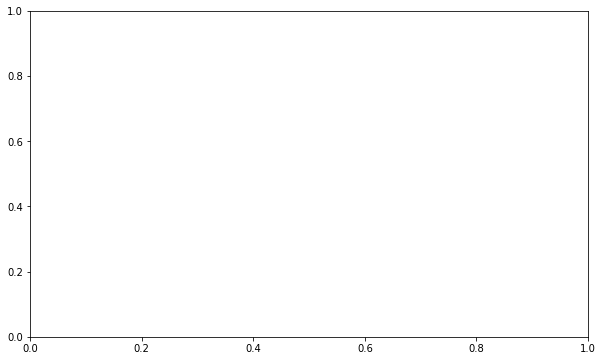

In [36]:
plot_entanglement_entropy(nQubits=3)

As a class object instead of a function

In [ ]:
import numpy as np

class QuantumSubsystem:
    def __init__(self, nQubits=8, min_val=0, max_val=1):
        self.nQubits = nQubits
        self.min_val = min_val
        self.max_val = max_val

    def Psi_indexed(self, i, j, normalized_Psi_AB, basis_B):
        if isinstance(i, int) and i > 0 and i <= len(normalized_Psi_AB) // len(basis_B) and isinstance(j, int) and j > 0 and j <= len(basis_B):
            return normalized_Psi_AB[(i-1) * len(basis_B) + (j-1)]
        else:
            raise ValueError("Index out of range.")

    def Psi_indexed_conjugate(self, i, j, normalized_Psi_AB, basis_B):
        return np.conjugate(self.Psi_indexed(i, j, normalized_Psi_AB, basis_B))

    def Density_Matrix_Psi_AB(self, i, j, k, l, normalized_Psi_AB, basis_B):
        Psi_i_j = self.Psi_indexed(i, j, normalized_Psi_AB, basis_B)
        Psi_k_l_conjugate = self.Psi_indexed_conjugate(k, l, normalized_Psi_AB, basis_B)
        return Psi_i_j * Psi_k_l_conjugate

    def Partial_Trace_Subsystem_B_v2(self, i, k, normalized_Psi_AB, basis_B):
        result = 0
        for j in range(len(basis_B)):
            result += self.Density_Matrix_Psi_AB(i, j+1, k, j+1, normalized_Psi_AB, basis_B)
        return result

    def generate_partial_trace_matrix(self, basis_A, basis_B, normalized_Psi_AB):
        matrix = np.zeros((len(basis_A), len(basis_A)))
        for i in range(len(basis_A)):
            for k in range(len(basis_A)):
                matrix[i, k] = self.Partial_Trace_Subsystem_B_v2(i+1, k+1, normalized_Psi_AB, basis_B)
        return matrix

    def calculate_eigenvalues(self, matrix):
        eigenvalues, eigenvectors = np.linalg.eig(matrix)
        return eigenvalues, eigenvectors

    def entanglement_entropy_internal(self, eigenvalues):
        sum_of_EE = 0
        for i in eigenvalues:
            if i > 0:  # Ensure we don't take the log of zero
                lambda_log_lambda = i * np.log(i)
                sum_of_EE += lambda_log_lambda

        entropy = -sum_of_EE

        # Replace NaN or -inf with 0
        if np.isnan(entropy) or np.isinf(entropy):
            entropy = 0

        return entropy

    def Entanglement_Entropy(self):
        for n_A in range(1, self.nQubits-1):
            n_B = self.nQubits - n_A
            basis_A = np.random.uniform(self.min_val, self.max_val, (2**n_A, 1))
            basis_B = np.random.uniform(self.min_val, self.max_val, (2**n_B, 1))
            Psi_AB = np.kron(basis_A, basis_B)

            # Normalize the statevector
            norm = np.linalg.norm(Psi_AB)
            normalized_Psi_AB = Psi_AB / norm

            partial_trace_matrix = self.generate_partial_trace_matrix(basis_A, basis_B, normalized_Psi_AB)

            # Take the eigenvalues of the partial_trace matrix
            eigenvalues, eigenvectors = self.calculate_eigenvalues(partial_trace_matrix)

            EE_final_value = self.entanglement_entropy_internal(eigenvalues)

        return EE_final_value

# Example usage
if __name__ == "__main__":
    quantum_subsystem = QuantumSubsystem(nQubits=8, min_val=0, max_val=1)
    EE_value = quantum_subsystem.Entanglement_Entropy()
    print("Entanglement Entropy:")
    print(EE_value)


Entanglement Entropy:
(8.577722564158611e-15-0j)


C:\Users\Acer Aspire 5\AppData\Local\Temp\ipykernel_16252\302637967.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[i, k] = self.Partial_Trace_Subsystem_B_v2(i+1, k+1, normalized_Psi_AB, basis_B)


In [ ]:
if __name__ == "__main__":
    quantum_subsystem = QuantumSubsystem(nQubits=8, min_val=0, max_val=1)
    EE_value = quantum_subsystem.Entanglement_Entropy()
    print("Entanglement Entropy:")
    print(EE_value)

Entanglement Entropy:
(1.1944928500817369e-14-0j)


C:\Users\Acer Aspire 5\AppData\Local\Temp\ipykernel_16252\302637967.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[i, k] = self.Partial_Trace_Subsystem_B_v2(i+1, k+1, normalized_Psi_AB, basis_B)


## Version 3 of EE calculation

First we define the random statevector

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def psi_initial_random_state_gaussian(nQubits = 8, mean = 0, std = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    gaussian_ensemble = np.random.normal(mean, std, size = (2**nQubits, 1))
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    normalized_gaussian_ensemble = gaussian_ensemble / np.linalg.norm(gaussian_ensemble)
    return normalized_gaussian_ensemble

In [4]:
gaussian_statevector = psi_initial_random_state_gaussian(4, 0, 1)
print(gaussian_statevector)

[[-0.00101543]
 [-0.28796163]
 [ 0.06998969]
 [-0.01740374]
 [-0.32522598]
 [-0.27514684]
 [-0.12663356]
 [ 0.41429789]
 [ 0.11546968]
 [-0.22017212]
 [ 0.26083822]
 [-0.05888088]
 [-0.00821254]
 [-0.59575279]
 [ 0.1815347 ]
 [ 0.14650212]]


In [5]:
def psi_initial_random_state_uniform(nQubits = 8, min_val = 0, max_val = 1):
    """
    Generate a row vector of random zeros and ones, and then each of the components are multiplied by a constant taken from a Gaussian ensemble
    for each of the components of the statevector.

    Parameters:
    nQubits (int): The length of the vector which corresponds to how many qubits.

    Returns:
    numpy.ndarray: A row vector of random numbers from [0, 1].
    """
    if not isinstance(nQubits, int) or nQubits <= 0:
        raise ValueError("The number of qubits must be a positive integer.")
    uniform_ensemble = np.random.uniform(min_val, max_val, size = (2**nQubits, 1))
    normalized_uniform_ensemble = uniform_ensemble / np.linalg.norm(uniform_ensemble)
    #print(f"The gaussian ensemble for each of the components: \n", gaussian_ensemble)
    return normalized_uniform_ensemble

In [6]:
uniform_statevector = psi_initial_random_state_uniform(4, 0, 1)
print(uniform_statevector)

[[0.21424219]
 [0.19091433]
 [0.4610632 ]
 [0.36377477]
 [0.12225332]
 [0.24348477]
 [0.00192954]
 [0.19779281]
 [0.44908136]
 [0.28732674]
 [0.01504996]
 [0.29845466]
 [0.24688417]
 [0.13967053]
 [0.00993359]
 [0.07275626]]


In [7]:
np.log2(len(uniform_statevector))

4.0

Next is that we have the Psi_indexed function that can take specific qubits which will corresponds to the divided subsystems

In [8]:
def Psi_indexed_v2(normalized_matrix, n_A, i, j):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(i, int) and i > 0 and i <= 2**n_A and isinstance(j, int) and j > 0 and j <= 2**n_B:
        return normalized_matrix[(i - 1) * 2**n_B + (j - 1)]
    else:
        return ValueError("Indices are out of bounds or not integers")

In [9]:
def Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l):
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    if isinstance(k, int) and k > 0 and k <= 2**n_A and isinstance(l, int) and l > 0 and l <= 2**n_B:
        return np.conjugate(normalized_matrix[(k - 1) * 2**n_B + (l - 1)])
    else:
        return ValueError("Indices are out of bounds or not integers")

In [10]:
test_gaussian_psi_indexed = Psi_indexed_v2(gaussian_statevector, 2, 1, 1)
print(test_gaussian_psi_indexed)
test_uniform_psi_indexed = Psi_indexed_v2(uniform_statevector, 2, 1, 1)
print(test_uniform_psi_indexed)

[-0.00101543]
[0.21424219]


In [11]:
A = uniform_statevector
#print(A)
A_herm_conj = A.conj().T

print(A @ A_herm_conj)

[[4.58997155e-02 4.09019049e-02 9.87791893e-02 7.79359038e-02
  2.61918196e-02 5.21647108e-02 4.13388364e-04 4.23755656e-02
  9.62121745e-02 6.15575096e-02 3.22433577e-03 6.39415791e-02
  5.28930047e-02 2.99233193e-02 2.12819509e-03 1.55874593e-02]
 [4.09019049e-02 3.64482831e-02 8.80235742e-02 6.94498189e-02
  2.33399119e-02 4.64847335e-02 3.68376391e-04 3.77614836e-02
  8.57360699e-02 5.48547933e-02 2.87325257e-03 5.69792724e-02
  4.71337268e-02 2.66651056e-02 1.89646564e-03 1.38902120e-02]
 [9.87791893e-02 8.80235742e-02 2.12579275e-01 1.67723162e-01
  5.63665086e-02 1.12261869e-01 8.89638792e-04 9.11949884e-02
  2.07054891e-01 1.32475786e-01 6.93898144e-03 1.37606460e-01
  1.13829205e-01 6.43969400e-02 4.58001502e-03 3.35452318e-02]
 [7.79359038e-02 6.94498189e-02 1.67723162e-01 1.32332086e-01
  4.44726751e-02 8.85736185e-02 7.01917113e-04 7.19520366e-02
  1.63364472e-01 1.04522220e-01 5.47479479e-03 1.08570276e-01
  8.98102328e-02 5.08086143e-02 3.61359121e-03 2.64668902e-02]
 [2.

In [12]:
test_gaussian_psi_indexed = Psi_indexed_conjugate_v2(gaussian_statevector, 2, 1, 1)
print(test_gaussian_psi_indexed)
test_uniform_psi_indexed = Psi_indexed_conjugate_v2(uniform_statevector, 2, 1, 1)
print(test_uniform_psi_indexed)

[-0.00101543]
[0.21424219]


In [13]:
def Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, l):
    dense_matrix = Psi_indexed_v2(normalized_matrix, n_A, i, j) * Psi_indexed_conjugate_v2(normalized_matrix, n_A, k, l)
    return dense_matrix

In [14]:
test_gaussian_dense_matrix = Density_Matrix_Psi_AB_v2(gaussian_statevector, 1, i=1, j=1, k=1, l=1)
print(test_gaussian_dense_matrix)
test_uniform_dense_matrix = Density_Matrix_Psi_AB_v2(uniform_statevector, 2, i=1, j=2, k=1, l=2)
print(test_uniform_dense_matrix)

[1.03110794e-06]
[0.03644828]


In [15]:
def Partial_Trace_Subsystem_B_v3(normalized_matrix, n_A, i, k):
    result = 0
    n_B = int(np.log2(len(normalized_matrix)) - n_A)
    for j in range(1, 2**n_B):
        result += Density_Matrix_Psi_AB_v2(normalized_matrix, n_A, i, j, k, j)
    return result[0]

In [16]:
PT_gaussian = Partial_Trace_Subsystem_B_v3(gaussian_statevector, 1, 1, 1)
print(PT_gaussian)
PT_uniform = Partial_Trace_Subsystem_B_v3(uniform_statevector, 1, 1, 1)
print(PT_uniform)

0.2856381560688396
0.5014937932802284


In [17]:
PT_matrix_gaussian = np.array([[Partial_Trace_Subsystem_B_v3(gaussian_statevector, 2, i+1, j+1) for j in range(2**2)] for i in range(2**2)])
print(PT_matrix_gaussian)

[[ 0.08782149  0.07069893  0.08153986  0.18426784]
 [ 0.07069893  0.19751378 -0.01000495  0.14360204]
 [ 0.08153986 -0.01000495  0.12984559  0.17757104]
 [ 0.18426784  0.14360204  0.17757104  0.38794368]]


In [18]:
def partial_matrix_v3(normalized_matrix, n_A):
    PT_matrix = np.array([[Partial_Trace_Subsystem_B_v3(normalized_matrix, n_A, i+1, j+1) for j in range(2**n_A)] for i in range(2**n_A)])
    return PT_matrix

In [19]:
PT_gaussian_nA_1 = partial_matrix_v3(gaussian_statevector, 1)
PT_gaussian_nA_2 = partial_matrix_v3(gaussian_statevector, 2)
PT_gaussian_nA_3 = partial_matrix_v3(gaussian_statevector, 3)

In [20]:
eigenval_PT_nA_1, eigenvec_PT_nA_1 = np.linalg.eig(PT_gaussian_nA_1)
print(eigenval_PT_nA_1)
eigenval_PT_nA_2, eigenvec_PT_nA_2 = np.linalg.eig(PT_gaussian_nA_2)
print(eigenval_PT_nA_2)
eigenval_PT_nA_3, eigenvec_PT_nA_3 = np.linalg.eig(PT_gaussian_nA_3)
print(eigenval_PT_nA_3)

[0.14843676 0.65845763]
[6.13103540e-01 1.84016776e-01 3.65916128e-17 6.00422019e-03]
[ 0.00000000e+00  2.41099703e-01  1.03673664e-17  5.87411643e-18
 -4.74466164e-18 -2.16265713e-18 -1.27785452e-18  6.94763817e-21]


next is to get each of the components and multiply it with its log like this,
$$
S_A = -Tr[\lambda_A \log{\lambda_A}],
$$
where lambda is the eigenvalues we have calculated using `np.linalg.eig`

In [21]:
def Entanglement_Entropy_lambda(eigenvalues_input):
    sum_of_EE = 0
    #epsilon = 1e-14
    for i in eigenvalues_input:
        if i > 0 :  # Ensure we don't take the log of zero
            lambda_log_lambda = i * np.log(i)
            sum_of_EE += lambda_log_lambda

    entropy = -sum_of_EE

    # Replace NaN or -inf with 0
    if np.isnan(entropy) or np.isinf(entropy):
        entropy = 0

    return entropy

In [22]:
EE_gaussian_nA_1 = Entanglement_Entropy_lambda(eigenval_PT_nA_1)
print(EE_gaussian_nA_1)
EE_gaussian_nA_2 = Entanglement_Entropy_lambda(eigenval_PT_nA_2)
print(EE_gaussian_nA_2)
EE_gaussian_nA_3 = Entanglement_Entropy_lambda(eigenval_PT_nA_3)
print(EE_gaussian_nA_3)

0.5582972918705005
0.642147160824542
0.34297511076883436


Combining everything into 1 function

In [23]:
def Entanglement_Entropy_COMBINED_uniform(normalized_statevector, n_A=1):
    PT_matrix_uniform = np.array([[Partial_Trace_Subsystem_B_v3(normalized_statevector, n_A, i+1, j+1) for j in range(2**n_A)] for i in range(2**n_A)])
    eigenval_PT_nA, eigenvec_PT_nA = np.linalg.eig(PT_matrix_uniform)
    EE_final_result = Entanglement_Entropy_lambda(eigenval_PT_nA)
    return EE_final_result

In [24]:
uniform_statevector_test = psi_initial_random_state_uniform(8, 0, 1)
print(uniform_statevector_test)

[[0.04138094]
 [0.00039287]
 [0.10061151]
 [0.03400253]
 [0.01493643]
 [0.01122252]
 [0.06798897]
 [0.00276532]
 [0.06678236]
 [0.10443234]
 [0.00401077]
 [0.00637168]
 [0.04928116]
 [0.010142  ]
 [0.05294018]
 [0.09141956]
 [0.06849024]
 [0.079198  ]
 [0.02704718]
 [0.03713735]
 [0.09682787]
 [0.07647116]
 [0.01984786]
 [0.08708782]
 [0.00835423]
 [0.00195799]
 [0.04206626]
 [0.0493775 ]
 [0.09632338]
 [0.07890839]
 [0.06161624]
 [0.03816459]
 [0.01667576]
 [0.08047048]
 [0.02200309]
 [0.07730758]
 [0.08614997]
 [0.07858982]
 [0.02345275]
 [0.04098562]
 [0.03023752]
 [0.04996714]
 [0.06076992]
 [0.02435005]
 [0.08074102]
 [0.03466124]
 [0.04329899]
 [0.08194922]
 [0.02813015]
 [0.09488834]
 [0.09219798]
 [0.08534299]
 [0.01790039]
 [0.03198575]
 [0.09902877]
 [0.10577539]
 [0.06821143]
 [0.01468276]
 [0.02457677]
 [0.07189029]
 [0.07885168]
 [0.04681025]
 [0.05176581]
 [0.0442446 ]
 [0.05062842]
 [0.03202023]
 [0.03689874]
 [0.03440954]
 [0.06853856]
 [0.03921796]
 [0.10001051]
 [0.02

In [25]:
Entanglement_Entropy_COMBINED_uniform(uniform_statevector_test, 1)

0.3575558630370961

In [26]:
def plot_entanglement_entropy_qubits(normalized_statevector):
    fig, ax = plt.subplots()
    EE_list = []

    n_A_values = int(np.log2(len(normalized_statevector)) - 1)

    for i in range(n_A_values):
        EE_value = Entanglement_Entropy_COMBINED_uniform(normalized_statevector, i+1)
        EE_list.append(EE_value)
    
    # Plot the entanglement entropy values
    ax.plot(range(1, n_A_values+1), EE_list, marker='o', linestyle='-', color='b', label='Entanglement Entropy')
    
    # Set the title and labels
    ax.set_title('Entanglement Entropy vs. Subsystem Size')
    ax.set_xlabel('Number of Qubits in Subsystem A')
    ax.set_ylabel('Entanglement Entropy')
    
    # Add a grid
    ax.grid(True)
    
    # Add a legend
    ax.legend()
    
    # Display the plot
    plt.show()
    
    return EE_list


[[0.07424418]
 [0.10285257]
 [0.13680919]
 [0.11081724]
 [0.14605674]
 [0.05465108]
 [0.00134137]
 [0.14521467]
 [0.15193005]
 [0.06975838]
 [0.12296256]
 [0.04046332]
 [0.10281296]
 [0.12566027]
 [0.13791355]
 [0.04945432]
 [0.03587269]
 [0.1363053 ]
 [0.09574146]
 [0.15467189]
 [0.0577992 ]
 [0.09895452]
 [0.05080009]
 [0.11549125]
 [0.10227689]
 [0.00267262]
 [0.00621897]
 [0.01642229]
 [0.02256264]
 [0.07056746]
 [0.10351514]
 [0.11881569]
 [0.11798984]
 [0.08359071]
 [0.14999231]
 [0.07947119]
 [0.04233042]
 [0.10399446]
 [0.12559662]
 [0.03065572]
 [0.0887419 ]
 [0.12404349]
 [0.10908275]
 [0.10016146]
 [0.0155587 ]
 [0.09846541]
 [0.02638756]
 [0.12876876]
 [0.00608616]
 [0.04260437]
 [0.00778701]
 [0.05635236]
 [0.04241713]
 [0.11111375]
 [0.05448758]
 [0.02303334]
 [0.15517525]
 [0.08172609]
 [0.05548434]
 [0.08985567]
 [0.05394996]
 [0.09300055]
 [0.08214815]
 [0.13184601]
 [0.07961237]
 [0.12870461]
 [0.00645666]
 [0.03571656]
 [0.14326306]
 [0.08320054]
 [0.13969901]
 [0.01

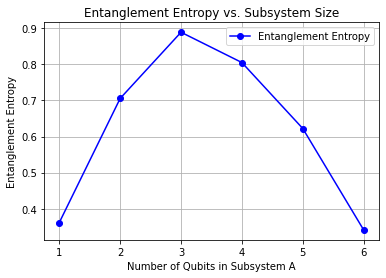

[0.3619231040497556,
 0.70538968170633,
 0.8885312832075855,
 (0.8046409943540617-0j),
 (0.6221658036164902-0j),
 (0.34155266481501845-0j)]

In [37]:
uniform_statevector_test = psi_initial_random_state_uniform(7, 0, 1)
print(uniform_statevector_test)
plot_entanglement_entropy_qubits(uniform_statevector_test)

In [31]:
gaussian_statevector_test = psi_initial_random_state_gaussian(10, 0, 1)

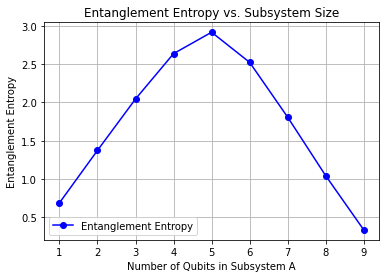

[0.6876935915953176,
 1.372925782867458,
 2.044106951655724,
 2.6360525793099665,
 2.915319111930162,
 (2.5222617208511258-0j),
 (1.8063839447814576-0j),
 (1.0416737328245564-0j),
 (0.33527020133552926-0j)]

In [32]:
plot_entanglement_entropy_qubits(gaussian_statevector_test)